# 🌾 Rice Type Classification

This notebook classifies rice grain types using a neural network.

## 🔧 1. Installing Required Libraries
We begin by installing any external dependencies.

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/mssmartypants/rice-type-classification'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jhanvimurarka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


## 📚 2. Importing Libraries
Standard Python and PyTorch libraries used for data processing, model training, and evaluation.

In [ ]:
import torch
import torch.nn as nn #nural network
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## 📥 3. Loading Dataset
We load the rice classification dataset downloaded using the `opendatasets` package.

In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


## 🧹 4. Data Cleaning
We check for and drop any null values to ensure clean data.

In [ ]:
data_df.dropna(inplace=True)
data_df.drop(["id"],axis = 1,inplace=True)
print(data_df.shape)

(18185, 11)


## 👀 5. Exploring the Data
We examine the dataset structure and the class distribution.

In [ ]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
print(data_df["Class"].unique())

[1 0]


In [ ]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


## ⚖️ 6. Normalization
Standardize feature values for better model performance.

In [ ]:
#Normalize
original_df = data_df.copy()

for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


## 🔀 7. Train-Test Split
Split the data into training and testing sets.

In [ ]:
#Spliting
X = np.array(data_df.iloc[:,:-1])#all the rows execept the last column
Y = np.array(data_df.iloc[:,-1])#only the last column

## 🧠 8. Model Definition and Training
Define and train a neural network classifier using PyTorch.

In [ ]:
#train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#Validation
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size=0.5,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [ ]:
class dataset(Dataset):
  def __init__(self, X,Y):
    self.X = torch.tensor(X,dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y,dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index],self.Y[index]

In [ ]:
training_data = dataset(X_train,Y_train)
validation_data = dataset(X_val,Y_val)
testing_data = dataset(X_test,Y_test)

In [ ]:
# Data Loader
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
val_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=32, shuffle=True)

In [ ]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)

In [ ]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr=1e-3)

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_accuracy_train_plot = []
total_accuracy_validation_plot = []

epochs = 10
for epoch in range(epochs):
  total_accuracy_train = 0
  total_loss_train = 0
  total_accuracy_validation = 0
  total_loss_validation = 0

  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)
    batch_loss = criterion(prediction,labels)
    total_loss_train += batch_loss.item()

    accuracy = ((prediction).round() == labels).sum().item()
    total_accuracy_train += accuracy

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in val_dataloader:
      inputs, labels = data

      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction,labels)
      total_loss_validation += batch_loss.item()

      total_loss_validation += batch_loss.item()

      accuracy = ((prediction).round() == labels).sum().item()
      total_accuracy_validation += accuracy

  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_validation/1000,4))
  total_accuracy_train_plot.append(round(total_accuracy_train/training_data.__len__() * 100,4))
  total_accuracy_validation_plot.append(round(total_accuracy_validation/validation_data.__len__() * 100,4))

  print(f'''Epoch no. {epoch+1} Train Loss: {round(total_loss_train/1000,4)} Train Accuracy {round(total_accuracy_train/training_data.__len__() * 100,4)}
        Validation Loss: {round(total_loss_validation/1000,4)} Validation Accuracy {round(total_accuracy_validation/validation_data.__len__() * 100,4)}''')

  print("="*25)


Epoch no. 1 Train Loss: 0.2412 Train Accuracy 77.3824
        Validation Loss: 0.0784 Validation Accuracy 98.1305
Epoch no. 2 Train Loss: 0.1227 Train Accuracy 97.5489
        Validation Loss: 0.0331 Validation Accuracy 98.2038
Epoch no. 3 Train Loss: 0.0587 Train Accuracy 98.1695
        Validation Loss: 0.0187 Validation Accuracy 98.607
Epoch no. 4 Train Loss: 0.0378 Train Accuracy 98.3659
        Validation Loss: 0.0135 Validation Accuracy 98.607
Epoch no. 5 Train Loss: 0.029 Train Accuracy 98.4209
        Validation Loss: 0.011 Validation Accuracy 98.5704
Epoch no. 6 Train Loss: 0.0245 Train Accuracy 98.5152
        Validation Loss: 0.0098 Validation Accuracy 98.607
Epoch no. 7 Train Loss: 0.0219 Train Accuracy 98.5545
        Validation Loss: 0.0088 Validation Accuracy 98.607
Epoch no. 8 Train Loss: 0.0203 Train Accuracy 98.5466
        Validation Loss: 0.0084 Validation Accuracy 98.607
Epoch no. 9 Train Loss: 0.0192 Train Accuracy 98.6016
        Validation Loss: 0.0083 Validatio

In [ ]:
with torch.no_grad():
  total_loss_test = 0
  total_accuracy_test = 0
  for data in test_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)
    batch_loss_test = criterion(prediction,labels).item()
    total_loss_test += batch_loss_test

    accuracy = ((prediction).round() == labels).sum().item()
    total_accuracy_test += accuracy

print("Accuracy: ",round(total_accuracy_test/testing_data.__len__() * 100,4))


Accuracy:  98.827


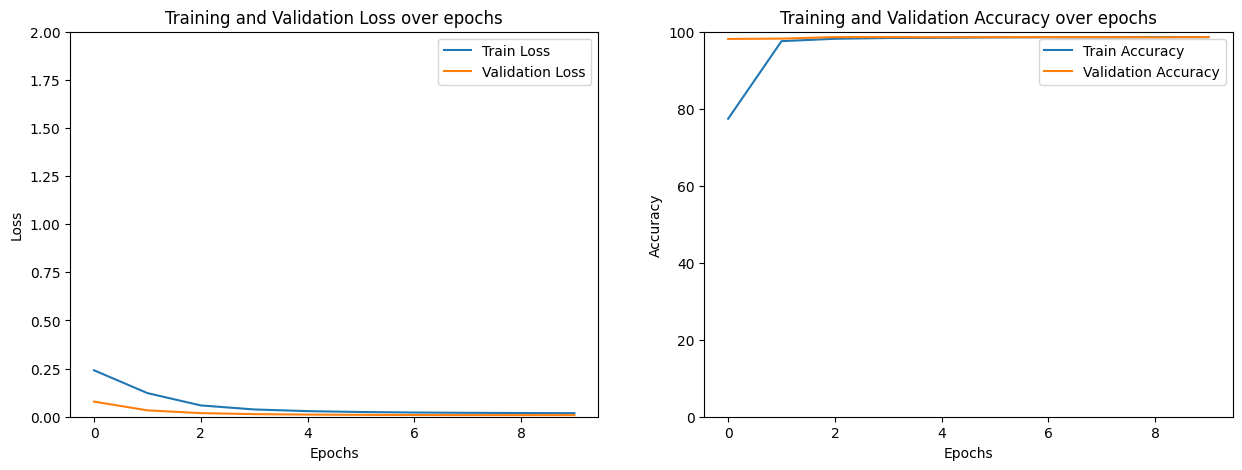

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axs[0].plot(total_loss_train_plot, label = "Train Loss")
axs[0].plot(total_loss_validation_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation Loss over epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_accuracy_train_plot, label = "Train Accuracy")
axs[1].plot(total_accuracy_validation_plot, label = "Validation Accuracy")
axs[1].set_title("Training and Validation Accuracy over epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()

In [ ]:
area = 2353/original_df["Area"].abs().max()
MajorAxisLength = 81/original_df["MajorAxisLength"].abs().max()
MinorAxisLength = 42/original_df["MinorAxisLength"].abs().max()
Eccentricity = 3/original_df["Eccentricity"].abs().max()
ConvexArea = 12/original_df["ConvexArea"].abs().max()
EquivDiameter = 33/original_df["EquivDiameter"].abs().max()
Extent = 98/original_df["Extent"].abs().max()
Perimeter = 927/original_df["Perimeter"].abs().max()
Roundness = 677/original_df["Roundness"].abs().max()
AspectRation = 24/original_df["AspectRation"].abs().max()

my_prediction = model(torch.tensor([area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation],dtype = torch.float32).to(device))


In [ ]:
round(my_prediction.item())

0.0